In [1]:
import pandas as pd
import numpy as np
# from src.encoder import encode, decode
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score, recall_score,classification_report
import matplotlib.pyplot as plt
from src.ANN import *
from src.dump import *
from sklearn.model_selection import KFold
from src.metrics import confusion_matrix_local,print_scores

In [2]:
df = pd.read_csv('Iris.csv')
df = df.drop(['Id'],axis=1)

x_train = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_train = df['Species'].map({
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}).astype(int)

In [3]:
labelled_y = []
for i in y_train:
    a = [0,0,0]
    a[i] = 1
    labelled_y.append(a)  

In [4]:
X = np.array(x_train)
Y = np.array(labelled_y)

In [5]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=420)

In [6]:
model = Sequential(random_state=42069)
model.add(Dense(units=16, input_dim=4, activation_function="linear"))
model.add(Dense(units=8, activation_function="relu"))
model.add(Dense(units=4, activation_function="linear"))
model.add(Dense(units=3, activation_function="relu"))
model.add(Dense(units=3, activation_function="sigmoid"))
model.compile("sum_squared_error", 0.0001, 0.001)


In [7]:
# model.fit(X, Y, batch_size=1, epoch=50)
# model.summary()

### Pembelajaran train-test 90-10

In [8]:
model.fit(train_x, train_y, batch_size=1, epoch=500)

In [9]:
y_pred = model.predict(test_x)

In [10]:
decode_test_y = []
for i in test_y:
  decode_test_y.append(np.argmax(i))

In [11]:
decode_pred_y = []
for i in y_pred:
  decode_pred_y.append(np.argmax(i))

In [12]:
# print("predicted label:")
# print(decode_pred_y)
# print("true label:")
# print(decode_test_y)
conf_mat = confusion_matrix_local(decode_pred_y, decode_test_y)
print("confusion matrix:")
print(conf_mat)
print("Performance Metrics:")
print_scores(conf_mat,[0,1,2])
print("\n")
print("confusion matrix from sklearn:")
print(confusion_matrix(y_pred=decode_pred_y, y_true=decode_test_y))
print("Performance Metrics from sklearn:")
print(classification_report(y_pred=decode_pred_y, y_true=decode_test_y, digits=3))



{0: 0, 1: 1, 2: 2}
confusion matrix:
[[13  0  0]
 [ 0  9  0]
 [ 0  2  6]]
Performance Metrics:
====== attribute:  0 ======
precision: 1.0
recall: 1.0
f1: 1.0

====== attribute:  1 ======
precision: 1.0
recall: 0.8181818181818182
f1: 0.9

====== attribute:  2 ======
precision: 0.75
recall: 1.0
f1: 0.8571428571428571

---- accuracy ----
0.9333333333333333


confusion matrix from sklearn:
[[13  0  0]
 [ 0  9  2]
 [ 0  0  6]]
Performance Metrics from sklearn:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        13
           1      1.000     0.818     0.900        11
           2      0.750     1.000     0.857         6

    accuracy                          0.933        30
   macro avg      0.917     0.939     0.919        30
weighted avg      0.950     0.933     0.935        30



### Pembelajaran cross validation

In [13]:
model.reset()

In [14]:
accurations = []
num_data = len(X)
k_fold = 10
# kf = KFold(n_splits=k_fold)
# for train, test in kf.split(X):
#   train_x, test_x = X[train], X[test]
#   train_y, test_y = Y[train], Y[test]
#   print(train_x.shape)
#   print(test_x.shape)
test_size = num_data//k_fold
test_slice_x = []
test_slice_y = []
remainder_x = []
remainder_y = []
total_pred_y = []
total_test_y = []

# X[:test_size]
# test_size
# num_data

for i in range(k_fold):
  if i == 0:
    test_slice_x, remainder_x = X[:test_size], X[test_size:]
    test_slice_y, remainder_y = Y[:test_size], Y[test_size:]
  else:
    start = (i-1)*(test_size)
    end = min(start + (test_size), num_data)
    remainder_x[start:end], test_slice_x = test_slice_x, remainder_x[start:end].copy()
    remainder_y[start:end], test_slice_y = test_slice_y, remainder_y[start:end].copy()
  # print(test_slice_y)
  # # print(y_test)
  # print('test_x: ', test_slice_x, 'train_x:', remainder_x)
  # print('test_y: ', test_slice_y, 'train_y: ', remainder_y)
  model.fit(remainder_x, remainder_y, batch_size=1, epoch=500)
  y_pred = model.predict(test_slice_x)
  decode_test_y = []
  for i in test_slice_y:
    decode_test_y.append(np.argmax(i))
  decode_pred_y = []
  for i in y_pred:
    decode_pred_y.append(np.argmax(i))
  
  # total_pred_y += decode_pred_y
  # total_test_y += decode_test_y
  print(decode_pred_y)
  print(decode_test_y)
  conf_mat = confusion_matrix_local(decode_pred_y, decode_test_y)
  print("Performance Metrics:")
  temp_list = decode_pred_y + decode_test_y
  temp_np = np.array(temp_list)
  classes = np.unique(temp_np)
  print(classes)
  print_scores(conf_mat,classes)
  accurations.append(accuracy_score(y_pred=decode_pred_y, y_true=decode_test_y))
  model.reset()

# print("predicted label:")
# print(total_pred_y)
# print("true label:")
# print(total_test_y)
# print("accuracy:")
# print(accuracy_score(y_pred=total_pred_y, y_true=total_test_y))
# print("confusion matrix:")
# print(confusion_matrix(total_pred_y, total_test_y))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
{0: 0}
Performance Metrics:
[0]
====== attribute:  0 ======
precision: 1.0
recall: 1.0
f1: 1.0

---- accuracy ----
1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
{0: 0}
Performance Metrics:
[0]
====== attribute:  0 ======
precision: 1.0
recall: 1.0
f1: 1.0

---- accuracy ----
1.0
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
{0: 0}
Performance Metrics:
[0]
====== attribute:  0 ======
precision: 1.0
recall: 1.0
f1: 1.0

---- accuracy ----
1.0
[0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
{0: 0, 1: 1, 2: 2}
Performance Metrics:
[0 1 2]
====== attribute:  0 ======
precision: 1.0
recall: 1.0
f1: 1.0

====== attribute:  1 ======
precision: 1.0
recall: 0.3
f1: 0.4615384615384615

====== attribute:  2 ======
precision: 0.0
recall: 0
f1: 0

---- accuracy ----
0.533

d:\Document\Perkuliahan\Kuliah_Semester_6\ML\ArtificialNeuralNetwork\src\metrics.py:56: RuntimeWarning: invalid value encountered in long_scalars
  print("recall:", 0 if math.isnan((tp)/(tp+fn)) else (tp)/(tp+fn))
d:\Document\Perkuliahan\Kuliah_Semester_6\ML\ArtificialNeuralNetwork\src\metrics.py:57: RuntimeWarning: invalid value encountered in long_scalars
  print("f1:", f1((tp)/(tp+fp), (tp)/(tp+fn)))


[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
{1: 0, 2: 1}
Performance Metrics:
[1 2]
====== attribute:  1 ======
precision: 1.0
recall: 0.8
f1: 0.888888888888889

====== attribute:  2 ======
precision: 0.0
recall: 0
f1: 0

---- accuracy ----
0.8


d:\Document\Perkuliahan\Kuliah_Semester_6\ML\ArtificialNeuralNetwork\src\metrics.py:56: RuntimeWarning: invalid value encountered in long_scalars
  print("recall:", 0 if math.isnan((tp)/(tp+fn)) else (tp)/(tp+fn))
d:\Document\Perkuliahan\Kuliah_Semester_6\ML\ArtificialNeuralNetwork\src\metrics.py:57: RuntimeWarning: invalid value encountered in long_scalars
  print("f1:", f1((tp)/(tp+fp), (tp)/(tp+fn)))


[1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
{1: 0, 2: 1}
Performance Metrics:
[1 2]
====== attribute:  1 ======
precision: 1.0
recall: 0.8
f1: 0.888888888888889

====== attribute:  2 ======
precision: 0.0
recall: 0
f1: 0

---- accuracy ----
0.8


d:\Document\Perkuliahan\Kuliah_Semester_6\ML\ArtificialNeuralNetwork\src\metrics.py:56: RuntimeWarning: invalid value encountered in long_scalars
  print("recall:", 0 if math.isnan((tp)/(tp+fn)) else (tp)/(tp+fn))
d:\Document\Perkuliahan\Kuliah_Semester_6\ML\ArtificialNeuralNetwork\src\metrics.py:57: RuntimeWarning: invalid value encountered in long_scalars
  print("f1:", f1((tp)/(tp+fp), (tp)/(tp+fn)))


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
{1: 0, 2: 1}
Performance Metrics:
[1 2]
====== attribute:  1 ======
precision: 1.0
recall: 1.0
f1: 1.0

====== attribute:  2 ======
precision: 1.0
recall: 1.0
f1: 1.0

---- accuracy ----
1.0
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
{2: 0}
Performance Metrics:
[2]
====== attribute:  2 ======
precision: 1.0
recall: 1.0
f1: 1.0

---- accuracy ----
1.0
[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
{1: 0, 2: 1}
Performance Metrics:
[1 2]
====== attribute:  1 ======
precision: 0.0
recall: 0
f1: 0

====== attribute:  2 ======
precision: 1.0
recall: 0.8666666666666667
f1: 0.9285714285714286

---- accuracy ----
0.8666666666666667


d:\Document\Perkuliahan\Kuliah_Semester_6\ML\ArtificialNeuralNetwork\src\metrics.py:56: RuntimeWarning: invalid value encountered in long_scalars
  print("recall:", 0 if math.isnan((tp)/(tp+fn)) else (tp)/(tp+fn))
d:\Document\Perkuliahan\Kuliah_Semester_6\ML\ArtificialNeuralNetwork\src\metrics.py:57: RuntimeWarning: invalid value encountered in long_scalars
  print("f1:", f1((tp)/(tp+fp), (tp)/(tp+fn)))


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
{2: 0}
Performance Metrics:
[2]
====== attribute:  2 ======
precision: 1.0
recall: 1.0
f1: 1.0

---- accuracy ----
1.0


In [15]:
accurations

[1.0,
 1.0,
 1.0,
 0.5333333333333333,
 0.8,
 0.8,
 1.0,
 1.0,
 0.8666666666666667,
 1.0]

In [16]:
np.average(accurations)

0.9

### Pembelajaran full training

In [17]:
model.fit(X, Y, batch_size=1, epoch=500)

In [18]:
# Dump model
dump(model, "fulltraining_model.json")

# Load data model
loaded_data = load("fulltraining_model.json")

loaded_model = Sequential()
loaded_model.useJSON(loaded_data)

instance = np.array([[5,4,3,2]])
print("instance: ", instance)
result = model.predict(instance)[0]
labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
label = "none"
for i in range(len(result)):
  if(result[i] == np.max(result)):
      label = labels[i]
      break
print("Predicted label:", label)

instance:  [[5 4 3 2]]
Predicted label: Iris-versicolor


### Analisis hasil

Berdasarkan pengujian yang dilakukan terhadap terhadap skema data split train 90% dan test 10%, model yang diimplementasi paling baik mengklasifikasi kelas setosa, ditunjukkan dengan akurasi dan presisi yang sempurna dari test set. di sisi lain, model memiliki kecenderungan lebih untuk mengklasifikasi virginica, ditunjukkan dengan adanya false positive untuk kelas tersebut, model juga tampaknya lebih sukar untuk mengklasifikasi versicolor karena terdapat false negative.

Dalam eksekusi kali ini juga, data tidak melalui tahap preprocessing sehingga ada kemungkinan bahwa model belum melakukan performa terbaik

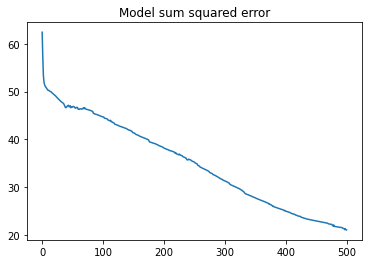

In [31]:
import matplotlib.pyplot as plt

plt.plot(model.errors)
plt.title("Model sum squared error")
plt.show()